# Preparation

In [2]:
# This file is based on: Work_13_0_regression_acp

In [3]:
import torch
torch.cuda.empty_cache() 

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [5]:
import pandas as pd
import pyproj

In [6]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
from pathlib import Path

In [8]:
# version control

In [9]:
# pip install statsmodels==0.14.1

In [10]:
# pip install sklearn==1.3.0

In [11]:
# from mtp_function_yl import *

In [12]:
import seaborn as sn

In [13]:
from scipy import stats

In [14]:
from tabulate import tabulate

In [15]:
import statsmodels.api as sm
import statsmodels.tools as tools

In [16]:
# pip install mlxtend

In [17]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.cluster import AgglomerativeClustering
# from sklearn.cluster import DBSCAN
# from sklearn.cluster import HDBSCAN
# from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay

import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [18]:
from sklearn.metrics import median_absolute_error

In [19]:
# pip install watermark

In [20]:
# Try for documentation and version control
# pip install watermark
%load_ext watermark

In [21]:
%watermark  -u -d -v -m --iversions

Last updated: 2024-09-08

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

statsmodels: 0.14.1
pyproj     : 3.3.1
PIL        : 8.4.0
scipy      : 1.11.3
cv2        : 4.8.1
matplotlib : 3.4.3
pandas     : 1.3.4
seaborn    : 0.11.2
sklearn    : 1.5.1
mlxtend    : 0.23.1
numpy      : 1.25.2
torch      : 2.0.1



# Data loading

## For science cluster environment

In [154]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [155]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [156]:
# same size
acv0 = acv.drop(['SV','LV','pd','svp','lvp','pdp'], axis = 1)
acv0 = acv0.assign(acp = 1)
acv0 = acv0.rename(columns = {'Nr':'id'})

In [157]:
rpv0 = rpv.drop(['speedlimit_7', 'z_qnr_34'], axis = 1)
rpv0 = rpv0.assign(acp = 0)

In [158]:
print(acv.columns.values)

['Nr' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [159]:
dfacrpv = pd.concat([acv0, rpv0])

In [160]:
len(dfacrpv.columns.values)

110

In [161]:
print(dfacrpv.columns.values)

['id' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [162]:
# dfacrpv.to_csv('/home/yelhe/script/mt/model/dfacrpv.csv', index = False)

## For local envionrment

In [22]:
dfacrpv = pd.read_csv('../MTP/dfacrpv.csv')

In [23]:
dfacrpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Columns: 110 entries, id to acp
dtypes: float64(36), int64(72), object(2)
memory usage: 934.3+ KB


In [24]:
dfacrpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Columns: 110 entries, id to acp
dtypes: float64(36), int64(72), object(2)
memory usage: 934.3+ KB


In [27]:
# droad_sl  'd_bicyclecount' 'd_carcount' 'curbtype'   'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

In [28]:
dfacrpv.shape

(1087, 110)

## Pre Processing

In [30]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

# Remove id, droad_sl ,'d_bicyclecount' 'd_carcount' 'curbtype'  
# 'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

In [31]:
y = dfacrpv['acp']
x = dfacrpv[cn]

In [32]:
y.shape

(1087,)

In [33]:
# 1087 points with 98 features in total

# Orginal regression model without feature selection

## OLS linear regression

### Without data splitting

In [122]:
# OLS
# With constant
x_const = tools.add_constant(x)
m00 = sm.OLS(y, x_const)
r00 = m00.fit()
r00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     21.88
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.67e-182
Time:                        20:05:18   Log-Likelihood:                -55.544
No. Observations:                1087   AIC:                             299.1
Df Residuals:                     993   BIC:                             768.3
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.386e+11   1.25e+12      0.271      0.787   -2.11e+12    2.79e+12
cp                  -0.2677      0.052     -5.177      0.000      -0.369      -0.166
ie                  -0.0318      0.079     -0.405      0.686      -0.186       0.123
iemin               -0.0036      0.050     -0.071      0.944      -0.102       0.095
iemax                0.0179      0.037      0.484      0.629      -0.055       0.091
mew                  0.0034      0.033      0.103      0.918      -0.061       0.068
mewmin              -0.0089      0.021     -0.419      0.675      -0.051       0.033
mewmax               0.0120      0.020      0.604      0.546      -0.027       0.051
meg                 -0.0100      0.029     -0.345      0.730      -0.067       0.047
megmin               0.0002      0.021      0.010      0.992      -0.040       0.041
megmax               0.0129      0.016      0.798      0.425      -0.019       0.045
cmean                0.0609      0.033      1.864      0.063      -0.003       0.125
cmin                -0.0151      0.009     -1.721      0.085      -0.032       0.002
cmax                 0.0807      0.040      2.042      0.041       0.003       0.158
dbusl               -0.0180      0.011     -1.580      0.114      -0.040       0.004
dtraml               0.0289      0.012      2.407      0.016       0.005       0.052
dtrainl              0.0301      0.011      2.775      0.006       0.009       0.051
dplight              0.0055      0.009      0.591      0.555      -0.013       0.024
dstation             0.0021      0.011      0.193      0.847      -0.019       0.023
dparkcar            -0.0068      0.011     -0.617      0.538      -0.029       0.015
dparktw              0.0059      0.010      0.565      0.572      -0.015       0.026
dpedcro              0.0045      0.010      0.436      0.663      -0.016       0.025
dstopsign            0.0300      0.012      2.549      0.011       0.007       0.053
dcurb               -0.0117      0.015     -0.792      0.429      -0.041       0.017
dtrafficarea         0.0398      0.014      2.880      0.004       0.013       0.067
droad               -0.0005      0.012     -0.043      0.966      -0.024       0.023
dvfpath             -0.0105      0.009     -1.176      0.240      -0.028       0.007
gvm_dwv             -0.1392      0.062     -2.261      0.024      -0.260      -0.018
gvm_msp              0.0279      0.053      0.527      0.598      -0.076       0.132
gvm_asp              0.0990      0.060      1.642      0.101      -0.019       0.217
r_width_value       -0.1304      0.020     -6.484      0.000      -0.170      -0.091
speedlimit_value    -0.2703      0.039     -6.978      0.000      -0.346      -0.194
curbtype_1        1.577e+11   5.82e+11      0.271      0.787   -9.85e+11     1.3e+12
curbtype_2        1.577

0.9365225390984361

Test accuracy : 
 0.9365225390984361

Confusion Matrix : 
 [[770  22]
 [ 47 248]]


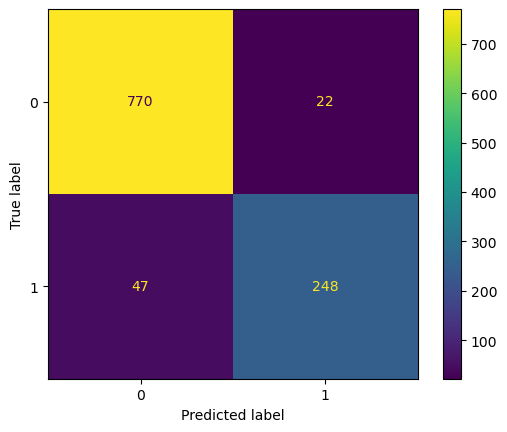

In [124]:
pred00 = r00.predict(x_const)
pred00 = list(map(round,pred00))
print(accuracy_score(y, pred00))
print('\nTest accuracy : \n', accuracy_score(y, pred00))
cm00 = confusion_matrix(y, pred00) 
print ('\nConfusion Matrix : \n', cm00)
cm00_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00)
cm00_display.plot()

In [125]:
acc_ols = metrics.accuracy_score(y, pred00)
print('accuracy', acc_ols)

pre_ols = metrics.precision_score(y, pred00, average = None)
print('precision', pre_ols)

senrec_ols = metrics.recall_score(y, pred00, average = None)
print('sensitivity recall', senrec_ols)

f1_ols = metrics.f1_score(y, pred00, average = None)
print('f1 score', f1_ols)

pre_ols_m = np.mean(pre_ols)
senrec_ols_m = np.mean(senrec_ols)
f1_ols_m = np.mean(f1_ols)
print('mean precision', pre_ols_m)
print('mean recall', senrec_ols_m)
print('mean f1 score', f1_ols_m)

accuracy 0.9365225390984361
precision [0.94247246 0.91851852]
sensitivity recall [0.97222222 0.84067797]
f1 score [0.95711622 0.87787611]
mean precision 0.9304954893694184
mean recall 0.9064500941619585
mean f1 score 0.9174961637250642


### With data splitting

In [138]:
# OLS
X_train, X_test, y_train, y_test = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=3)

m00_split = sm.OLS(y_train, X_train)
r00_split = m00_split.fit()
r00_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     18.01
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          6.28e-130
Time:                        20:07:45   Log-Likelihood:                 25.095
No. Observations:                 760   AIC:                             137.8
Df Residuals:                     666   BIC:                             573.3
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1971      0.084      2.358      0.019       0.033       0.361
cp                  -0.2474      0.059     -4.179      0.000      -0.364      -0.131
ie                  -0.0645      0.091     -0.707      0.480      -0.244       0.115
iemin                0.0275      0.060      0.461      0.645      -0.089       0.144
iemax                0.0198      0.041      0.483      0.629      -0.061       0.100
mew                 -0.0019      0.038     -0.051      0.959      -0.076       0.072
mewmin              -0.0167      0.024     -0.687      0.493      -0.065       0.031
mewmax               0.0298      0.022      1.345      0.179      -0.014       0.073
meg                 -0.0266      0.033     -0.805      0.421      -0.092       0.038
megmin               0.0078      0.024      0.331      0.741      -0.039       0.054
megmax               0.0146      0.019      0.786      0.432      -0.022       0.051
cmean                0.0700      0.037      1.914      0.056      -0.002       0.142
cmin                -0.0081      0.010     -0.838      0.402      -0.027       0.011
cmax                 0.0655      0.045      1.449      0.148      -0.023       0.154
dbusl               -0.0183      0.013     -1.428      0.154      -0.043       0.007
dtraml               0.0234      0.013      1.733      0.084      -0.003       0.050
dtrainl              0.0277      0.013      2.112      0.035       0.002       0.053
dplight              0.0057      0.011      0.545      0.586      -0.015       0.026
dstation            -0.0068      0.013     -0.535      0.593      -0.032       0.018
dparkcar            -0.0019      0.013     -0.145      0.885      -0.027       0.023
dparktw              0.0049      0.012      0.404      0.687      -0.019       0.029
dpedcro              0.0023      0.012      0.200      0.842      -0.021       0.025
dstopsign            0.0354      0.013      2.665      0.008       0.009       0.062
dcurb               -0.0198      0.016     -1.207      0.228      -0.052       0.012
dtrafficarea         0.0445      0.016      2.737      0.006       0.013       0.076
droad                0.0085      0.014      0.624      0.533      -0.018       0.035
dvfpath             -0.0098      0.010     -0.967      0.334      -0.030       0.010
gvm_dwv             -0.1346      0.068     -1.969      0.049      -0.269      -0.000
gvm_msp             -0.0024      0.059     -0.041      0.967      -0.118       0.113
gvm_asp              0.1308      0.067      1.964      0.050    8.31e-07       0.262
r_width_value       -0.1396      0.023     -6.079      0.000      -0.185      -0.094
speedlimit_value    -0.2162      0.046     -4.695      0.000      -0.307      -0.126
curbtype_1           0.1781      0.045      3.971      0.000       0.090       0.266
curbtype_2           0.


Test accuracy : 
 0.8776758409785933

Confusion Matrix : 
 [[216  14]
 [ 26  71]]


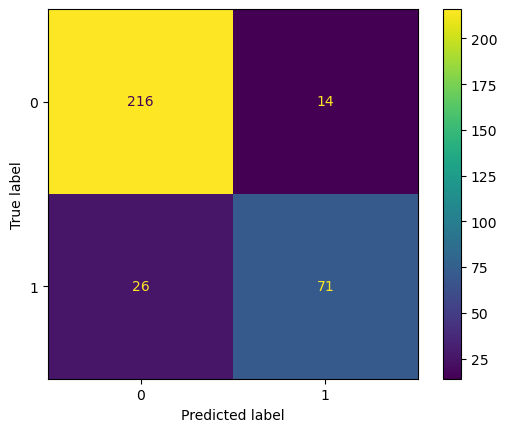

In [139]:
pred00split = r00_split.predict(X_test)
pred00split = list(map(round,pred00split))
print('\nTest accuracy : \n', accuracy_score(y_test, pred00split))
cm00split = confusion_matrix(y_test, pred00split) 
print ('\nConfusion Matrix : \n', cm00split) 
cm00split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00split)
cm00split_display.plot()

In [140]:
acc_ols_sp = metrics.accuracy_score(y_test, pred00split)
print('accuracy', acc_ols_sp)

pre_ols_sp = metrics.precision_score(y_test, pred00split, average = None)
print('precision', pre_ols_sp)

senrec_ols_sp = metrics.recall_score(y_test, pred00split, average = None)
print('sensitivity recall', senrec_ols_sp)

f1_ols_sp = metrics.f1_score(y_test, pred00split, average = None)
print('f1 score', f1_ols_sp)

pre_ols_sp_m = np.mean(pre_ols_sp)
senrec_ols_sp_m = np.mean(senrec_ols_sp)
f1_ols_sp_m = np.mean(f1_ols_sp)
print('mean precision', pre_ols_sp_m)
print('mean recall', senrec_ols_sp_m)
print('mean f1 score', f1_ols_sp_m)

accuracy 0.8776758409785933
precision [0.89256198 0.83529412]
sensitivity recall [0.93913043 0.73195876]
f1 score [0.91525424 0.78021978]
mean precision 0.8639280505590666
mean recall 0.8355445988346033
mean f1 score 0.8477370087539579


## Logistic regression

### Without data splitting

In [116]:

# Without constant
# m00_log = sm.Logit(y, x)
# r00_log = m00_log.fit_regularized()
# r00_log.summary()

# Add constant
x_const = tools.add_constant(x)
m00_log = sm.Logit(y,x_const)
r00_log = m00_log.fit_regularized()

r00_log.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1284148018262571
            Iterations: 786
            Function evaluations: 786
            Gradient evaluations: 786


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                      988
Method:                           MLE   Df Model:                           98
Date:                Mon, 02 Sep 2024   Pseudo R-squ.:                  0.7804
Time:                        19:56:56   Log-Likelihood:                -139.59
converged:                       True   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                9.073e-148
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -20.7743   3.48e+07  -5.97e-07      1.000   -6.82e+07    6.82e+07
cp                  -7.1341      1.346     -5.299      0.000      -9.773      -4.495
ie                  -2.0418      1.727     -1.182      0.237      -5.426       1.342
iemin                0.7372      1.064      0.693      0.488      -1.348       2.823
iemax                1.1006      0.849      1.296      0.195      -0.564       2.765
mew                 -0.0785      0.688     -0.114      0.909      -1.426       1.269
mewmin              -0.2396      0.466     -0.514      0.607      -1.153       0.674
mewmax               0.4441      0.419      1.060      0.289      -0.377       1.265
meg                  0.2552      0.591      0.432      0.666      -0.904       1.414
megmin              -0.0286      0.419     -0.068      0.946      -0.851       0.793
megmax              -0.0844      0.318     -0.266      0.791      -0.707       0.538
cmean                1.8424      0.761      2.422      0.015       0.352       3.333
cmin                -0.3039      0.223     -1.365      0.172      -0.740       0.133
cmax                 1.7782      0.830      2.142      0.032       0.151       3.406
dbusl               -0.6944      0.268     -2.591      0.010      -1.220      -0.169
dtraml               1.2863      0.320      4.017      0.000       0.659       1.914
dtrainl              0.8604      0.235      3.657      0.000       0.399       1.321
dplight             -0.0127      0.195     -0.065      0.948      -0.395       0.369
dstation            -0.1013      0.258     -0.392      0.695      -0.608       0.405
dparkcar            -0.0964      0.232     -0.415      0.678      -0.551       0.358
dparktw             -0.0384      0.240     -0.160      0.873      -0.509       0.432
dpedcro              0.1537      0.220      0.699      0.484      -0.277       0.584
dstopsign            0.4593      0.263      1.748      0.080      -0.056       0.974
dcurb               -0.3406      0.334     -1.020      0.308      -0.995       0.314
dtrafficarea         0.6052      0.280      2.161      0.031       0.056       1.154
droad               -0.1069      0.265     -0.404      0.686      -0.626       0.412
dvfpath             -0.1719      0.201     -0.857      0.392      -0.565       0.221
gvm_dwv             -3.4189      1.362     -2.510      0.012      -6.089      -0.749
gvm_msp              1.1842      1.099      1.078      0.281      -0.969       3.338
gvm_asp              1.9325      1.354      1.428      0.153      -0.721       4.586
r_width_value       -2.4630      0.459     -5.364      0.000      -3.363      -1.563
speedlimit_value    -2.7200      0.764     -3.560      0.000      -4.218      -1.222
curbtype_1         -13.4520        nan        nan        nan         nan         nan
curbtype_2         -17.0087        nan        nan        nan         nan         nan
z_qnr_1             23.3769    287.337      0.081      0.935    -539.793     586.547
z_qnr_2    

0.9494020239190433

Test accuracy : 
 0.9494020239190433

Confusion Matrix : 
 [[765  27]
 [ 28 267]]
accuracy 0.9494020239190433
precision [0.96469105 0.90816327]
sensitivity recall [0.96590909 0.90508475]
f1 score [0.96529968 0.90662139]
mean precision 0.9364271559821911
mean recall 0.9354969183359014
mean f1 score 0.9359605383663697


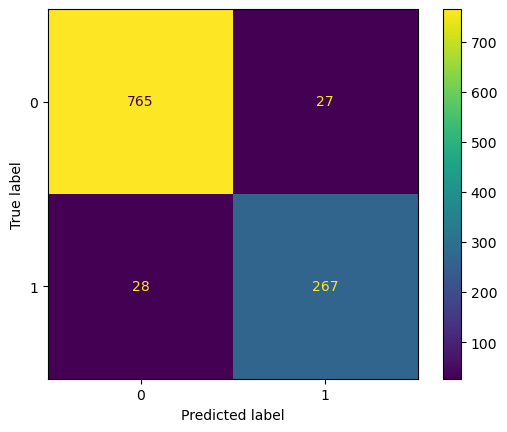

In [117]:
pred00log = r00_log.predict(x_const)
pred00log = list(map(round,pred00log))
print(accuracy_score(y, pred00log))
print('\nTest accuracy : \n', accuracy_score(y, pred00log))
cm00log = confusion_matrix(y, pred00log) 
print ('\nConfusion Matrix : \n', cm00log)
cm00log_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log)
cm00log_display.plot()

acc_log = metrics.accuracy_score(y, pred00log)
print('accuracy', acc_log)

pre_log = metrics.precision_score(y, pred00log, average = None)
print('precision', pre_log)

senrec_log = metrics.recall_score(y, pred00log, average = None)
print('sensitivity recall', senrec_log)

f1_log = metrics.f1_score(y, pred00log, average = None)
print('f1 score', f1_log)

pre_log_m = np.mean(pre_log)
senrec_log_m = np.mean(senrec_log)
f1_log_m = np.mean(f1_log)
print('mean precision', pre_log_m)
print('mean recall', senrec_log_m)
print('mean f1 score', f1_log_m)

### With data splitting

In [142]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=5)
m00_log_split = sm.Logit(y_train1,X_train1)
r00_log_split = m00_log_split.fit_regularized()
r00_log_split.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.09833021046956567
            Iterations: 733
            Function evaluations: 734
            Gradient evaluations: 733


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  760
Model:                          Logit   Df Residuals:                      661
Method:                           MLE   Df Model:                           98
Date:                Mon, 02 Sep 2024   Pseudo R-squ.:                  0.8366
Time:                        20:10:24   Log-Likelihood:                -74.731
converged:                       True   LL-Null:                       -457.28
Covariance Type:            nonrobust   LLR p-value:                6.244e-104
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.2022        nan        nan        nan         nan         nan
cp                 -13.7313      3.108     -4.418      0.000     -19.822      -7.640
ie                  -2.9561      3.078     -0.961      0.337      -8.988       3.076
iemin                1.1751      1.976      0.595      0.552      -2.699       5.049
iemax                1.4080      1.443      0.976      0.329      -1.420       4.236
mew                  3.1441      1.321      2.380      0.017       0.555       5.733
mewmin              -2.4098      0.873     -2.761      0.006      -4.121      -0.699
mewmax              -1.1125      0.778     -1.429      0.153      -2.638       0.413
meg                  0.2772      1.035      0.268      0.789      -1.751       2.305
megmin               0.3294      0.706      0.467      0.641      -1.054       1.713
megmax              -0.2004      0.507     -0.395      0.693      -1.194       0.793
cmean                1.3073      1.195      1.094      0.274      -1.035       3.650
cmin                -0.6651      0.447     -1.487      0.137      -1.542       0.212
cmax                 6.0100      1.853      3.244      0.001       2.378       9.642
dbusl               -0.1846      0.388     -0.476      0.634      -0.945       0.576
dtraml               1.5858      0.539      2.945      0.003       0.530       2.641
dtrainl              0.9331      0.392      2.378      0.017       0.164       1.702
dplight              0.0010      0.299      0.003      0.997      -0.585       0.588
dstation             0.1437      0.396      0.363      0.717      -0.632       0.919
dparkcar             0.2886      0.357      0.808      0.419      -0.411       0.988
dparktw             -0.1652      0.396     -0.417      0.676      -0.941       0.610
dpedcro             -0.1820      0.332     -0.549      0.583      -0.832       0.468
dstopsign            0.1900      0.439      0.433      0.665      -0.670       1.050
dcurb               -0.1580      0.470     -0.336      0.737      -1.080       0.764
dtrafficarea         0.5537      0.499      1.110      0.267      -0.424       1.532
droad               -0.0923      0.474     -0.195      0.846      -1.022       0.838
dvfpath              0.2844      0.344      0.828      0.408      -0.389       0.958
gvm_dwv              0.5543      2.364      0.235      0.815      -4.078       5.187
gvm_msp              1.4882      1.726      0.862      0.389      -1.895       4.871
gvm_asp             -2.7621      2.248     -1.229      0.219      -7.168       1.643
r_width_value       -2.8801      0.767     -3.757      0.000      -4.383      -1.377
speedlimit_value    -3.9393      1.217     -3.237      0.001      -6.324      -1.554
curbtype_1          -6.1578        nan        nan        nan         nan         nan
curbtype_2         -11.4305   1.18e+06  -9.67e-06      1.000   -2.32e+06    2.32e+06
z_qnr_1             26.6076    406.267      0.065      0.948    -769.662     822.877
z_qnr_2    

0.9602446483180428

Test accuracy : 
 0.9602446483180428

Confusion Matrix : 
 [[248   4]
 [  9  66]]
accuracy 0.9602446483180428
precision [0.96498054 0.94285714]
sensitivity recall [0.98412698 0.88      ]
f1 score [0.97445972 0.91034483]
mean precision 0.9539188438021122
mean recall 0.932063492063492
mean f1 score 0.9424022762685454


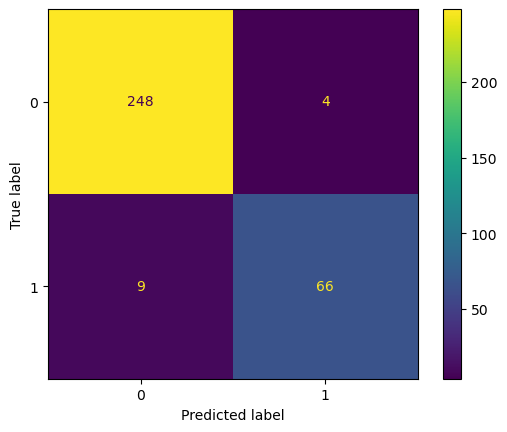

In [143]:
pred00log_split = r00_log.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()

acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)

pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)

senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)

f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)

pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

# Step wise feature selection

## Ordinary Least Squares Regression model

### Sequential forward floating selection

In [118]:
# Find the best size

# Scoring = neg_mean_squared_error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 2,
#                                 scoring='neg_mean_squared_error',
#                                 cv=25,
#                                 n_jobs = -1
#                                )
# selected_features8 = sfs.fit(x, y)

# Scoring = r2
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='r2',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features10 = sfs.fit(x, y)

# # # Scoring = median absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_median_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features13 = sfs.fit(x, y)

# # Scoring = mean absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_mean_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features16 = sfs.fit(x, y)


In [51]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
# print(selected_features.k_feature_names_)
# print(len(selected_features.k_feature_names_))
# print(selected_features.k_score_)
# # 26

('cp', 'cmean', 'dstopsign', 'dvfpath', 'r_width_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_18', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_knr_8', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_6', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'carcount')
-0.12571681174275004


In [108]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
# print(selected_features4.k_feature_names_)
# print(len(selected_features4.k_feature_names_))
# print(selected_features4.k_score_)
# 31

('cp', 'cmax', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_5', 'z_qnr_23', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
31
-0.10480516924101084


In [118]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 15
# print(selected_features6.k_feature_names_)
# print(len(selected_features6.k_feature_names_))
# print(selected_features6.k_score_)
# # 34

('cp', 'iemin', 'mew', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_10', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_8', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
34
-0.10202048337733939


In [123]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 20
# print(selected_features7.k_feature_names_)
# print(len(selected_features7.k_feature_names_))
# print(selected_features7.k_score_)
# 37

('cp', 'iemin', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_7', 'z_qnr_9', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
37
-0.09881583948361942


In [129]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 25
# print(selected_features8.k_feature_names_)
# print(len(selected_features8.k_feature_names_))
# print(selected_features8.k_score_)
#54

('cp', 'iemin', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_15', 'z_qnr_18', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_5', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
54
-0.09597409350628204


In [37]:
# # n = best, linear regression, scoring = r2, cv = 5
# print(selected_features1.k_feature_names_)
# print(len(selected_features1.k_feature_names_))
# print(selected_features1.k_score_)
# # 63

('cp', 'ie', 'iemin', 'mew', 'mewmin', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dstation', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_23', 'z_qnr_26', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'trafficarea_1', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'carcount')
63
0.11798916939950357


In [42]:
# # # n = best, linear regression, scoring = r2, cv = 10
# print(selected_features5.k_feature_names_)
# print(len(selected_features5.k_feature_names_))
# print(selected_features5.k_score_)
# # 84

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'meg', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'c

In [47]:
# # # n = best, linear regression, scoring = r2, cv = 15
# print(selected_features9.k_feature_names_)
# print(len(selected_features9.k_feature_names_))
# print(selected_features9.k_score_)
# # 59

('cp', 'ie', 'iemax', 'mewmin', 'meg', 'megmin', 'megmax', 'cmin', 'dbusl', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dcurb', 'dtrafficarea', 'gvm_asp', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_8', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5', 'carcount')
59
0.02927208794487847


In [52]:
# # # n = best, linear regression, scoring = r2, cv = 20
# print(selected_features10.k_feature_names_)
# print(len(selected_features10.k_feature_names_))
# print(selected_features10.k_score_)
# # 73

('ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
73
0.03566532407488141


In [57]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
# print(selected_features2.k_feature_names_)
# print(len(selected_features2.k_feature_names_))
# print(selected_features2.k_score_)
# #21

('z_qnr_7', 'z_qnr_8', 'z_qnr_12', 'z_qnr_19', 'z_qnr_22', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_knr_5', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
21
-0.154296875


In [63]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 10
# print(selected_features11.k_feature_names_)
# print(len(selected_features11.k_feature_names_))
# print(selected_features11.k_score_)
# # 16

('z_qnr_2', 'z_qnr_5', 'z_qnr_11', 'z_qnr_20', 'z_qnr_22', 'z_qnr_28', 'z_qnr_30', 'z_qnr_33', 'z_knr_4', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
16
-0.1231201171875


In [70]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 15
# print(selected_features12.k_feature_names_)
# print(len(selected_features12.k_feature_names_))
# print(selected_features12.k_score_)
# 21

('z_qnr_1', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_16', 'z_qnr_19', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_knr_9', 'z_knr_12', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
21
-0.1470978846351567


In [75]:
# # n = best, linear regression, scoring = neg median absolute error, cv = 20
# print(selected_features13.k_feature_names_)
# print(len(selected_features13.k_feature_names_))
# print(selected_features13.k_score_)
# # 11

('z_qnr_7', 'z_qnr_20', 'z_knr_7', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
11
-0.1203094482421875


In [80]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
# print(selected_features3.k_feature_names_)
# print(len(selected_features3.k_feature_names_))
# print(selected_features3.k_score_)
# # 24

('cp', 'cmean', 'cmax', 'dparkcar', 'dstopsign', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_3', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
24
-0.2746913055917502


In [85]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
# print(selected_features14.k_feature_names_)
# print(len(selected_features14.k_feature_names_))
# print(selected_features14.k_score_)
# # 28

('iemax', 'cmin', 'dplight', 'droad', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_33', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
28
-0.2319993756956884


In [90]:
# # n = best, linear regression, scoring = neg mean absolute error, cv = 15
# print(selected_features15.k_feature_names_)
# print(len(selected_features15.k_feature_names_))
# print(selected_features15.k_score_)
# # 24

('dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_7', 'z_qnr_12', 'z_qnr_22', 'z_qnr_26', 'z_qnr_33', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
24
-0.225972745204969


In [95]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 20
# print(selected_features16.k_feature_names_)
# print(len(selected_features16.k_feature_names_))
# print(selected_features16.k_score_)
# # 22

('cp', 'cmax', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_7', 'z_qnr_12', 'z_qnr_23', 'z_qnr_31', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'r_surface_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
22
-0.22486531300698415


In [99]:
df03 = pd.DataFrame.from_dict(selected_features3.get_metric_dict()).T

In [100]:
df03.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(93,)","[-0.6277228739650328, -0.2805621513690522, -0....",-0.308916,"(speedlimit_4,)",0.207701,0.161598,0.080799
2,"(92, 93)","[-0.6176246676905953, -0.2738056079710613, -0....",-0.293278,"(speedlimit_3, speedlimit_4)",0.212585,0.165398,0.082699
3,"(79, 92, 93)","[-0.5926592571466698, -0.27374709513607726, -0...",-0.289443,"(trafficarea_2, speedlimit_3, speedlimit_4)",0.199044,0.154863,0.077431
4,"(79, 84, 92, 93)","[-0.5844006866079063, -0.2788079548636461, -0....",-0.286587,"(trafficarea_2, r_width_4, speedlimit_3, speed...",0.196492,0.152877,0.076439
5,"(23, 79, 84, 92, 93)","[-0.5752839339293545, -0.27689071316763425, -0...",-0.285257,"(dtrafficarea, trafficarea_2, r_width_4, speed...",0.191239,0.14879,0.074395
6,"(23, 79, 84, 88, 92, 93)","[-0.5661389231323987, -0.2730666966621773, -0....",-0.283814,"(dtrafficarea, trafficarea_2, r_width_4, r_sur...",0.185824,0.144577,0.072289
7,"(23, 79, 84, 88, 92, 93, 94)","[-0.562952008055906, -0.2737815569187688, -0.1...",-0.282357,"(dtrafficarea, trafficarea_2, r_width_4, r_sur...",0.18501,0.143944,0.071972
8,"(23, 79, 84, 88, 92, 93, 94, 95)","[-0.5624035538328788, -0.27771008579418505, -0...",-0.281865,"(dtrafficarea, trafficarea_2, r_width_4, r_sur...",0.185606,0.144408,0.072204
9,"(23, 79, 84, 85, 88, 92, 93, 94, 95)","[-0.5562117121673993, -0.2808433872637015, -0....",-0.281414,"(dtrafficarea, trafficarea_2, r_width_4, r_wid...",0.18247,0.141968,0.070984
10,"(23, 30, 79, 84, 85, 88, 92, 93, 94, 95)","[-0.558993447116511, -0.2712610262033093, -0.2...",-0.280703,"(dtrafficarea, speedlimit_value, trafficarea_2...",0.183822,0.14302,0.07151


In [101]:
# # Feature selection - linear regression - neg mean squared error
# df03.to_csv('/home/yelhe/script/mtp/tables/fs_lr_nmae_mismean.csv', index = False)

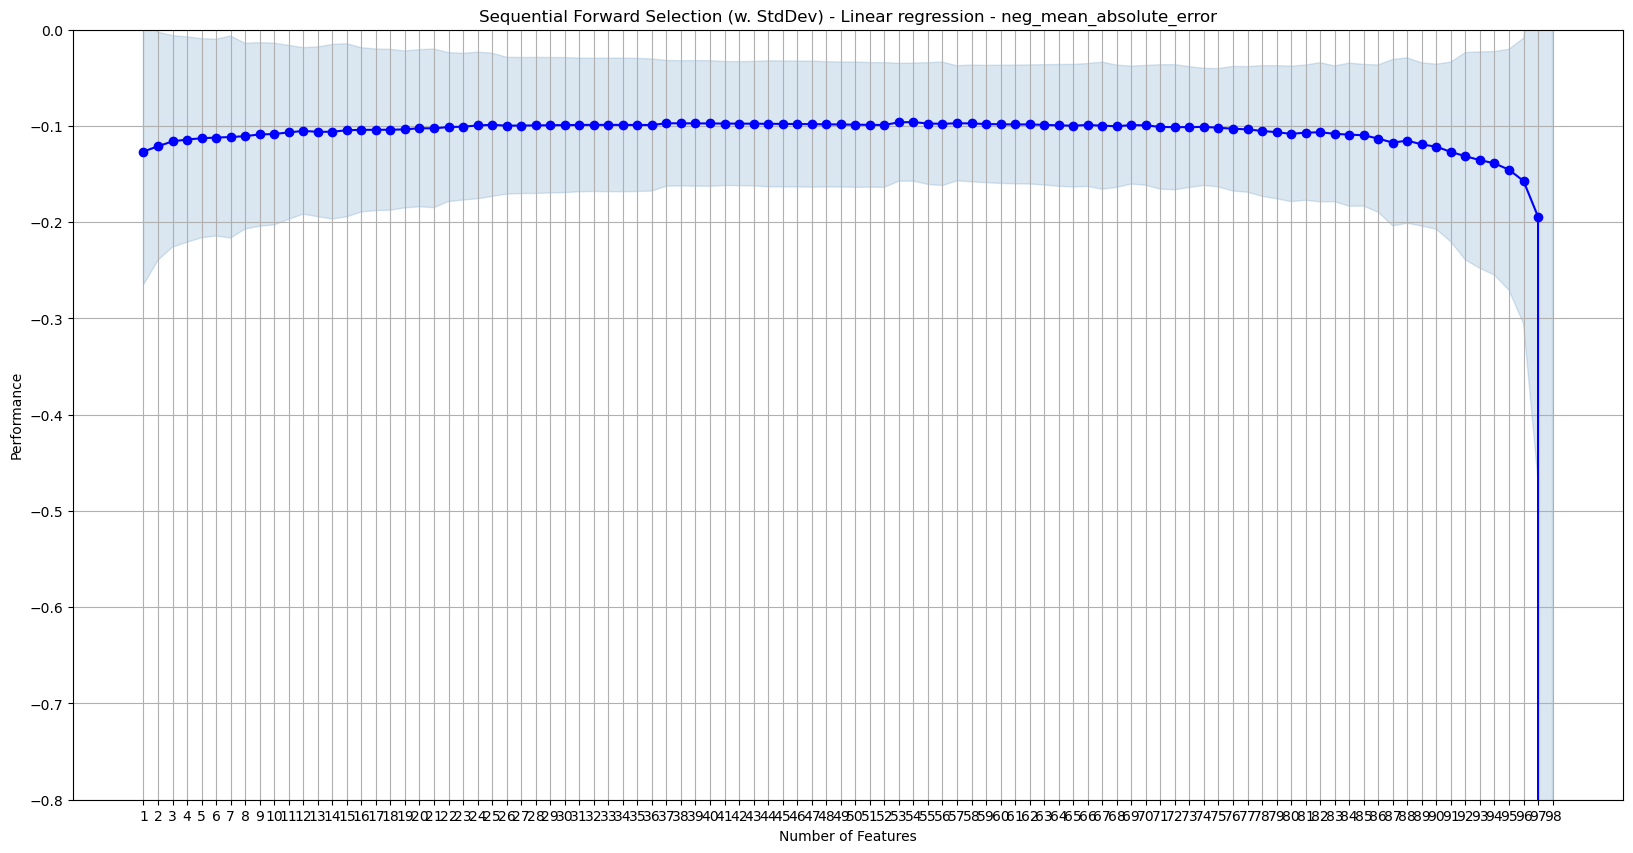

In [130]:
fig3 = plot_sfs(selected_features8.get_metric_dict(), figsize = (20,10), kind='std_dev')

plt.ylim([-0.8, 0])
plt.title('Sequential Forward Selection (w. StdDev) - Linear regression - neg_mean_absolute_error')
plt.grid()
plt.show()

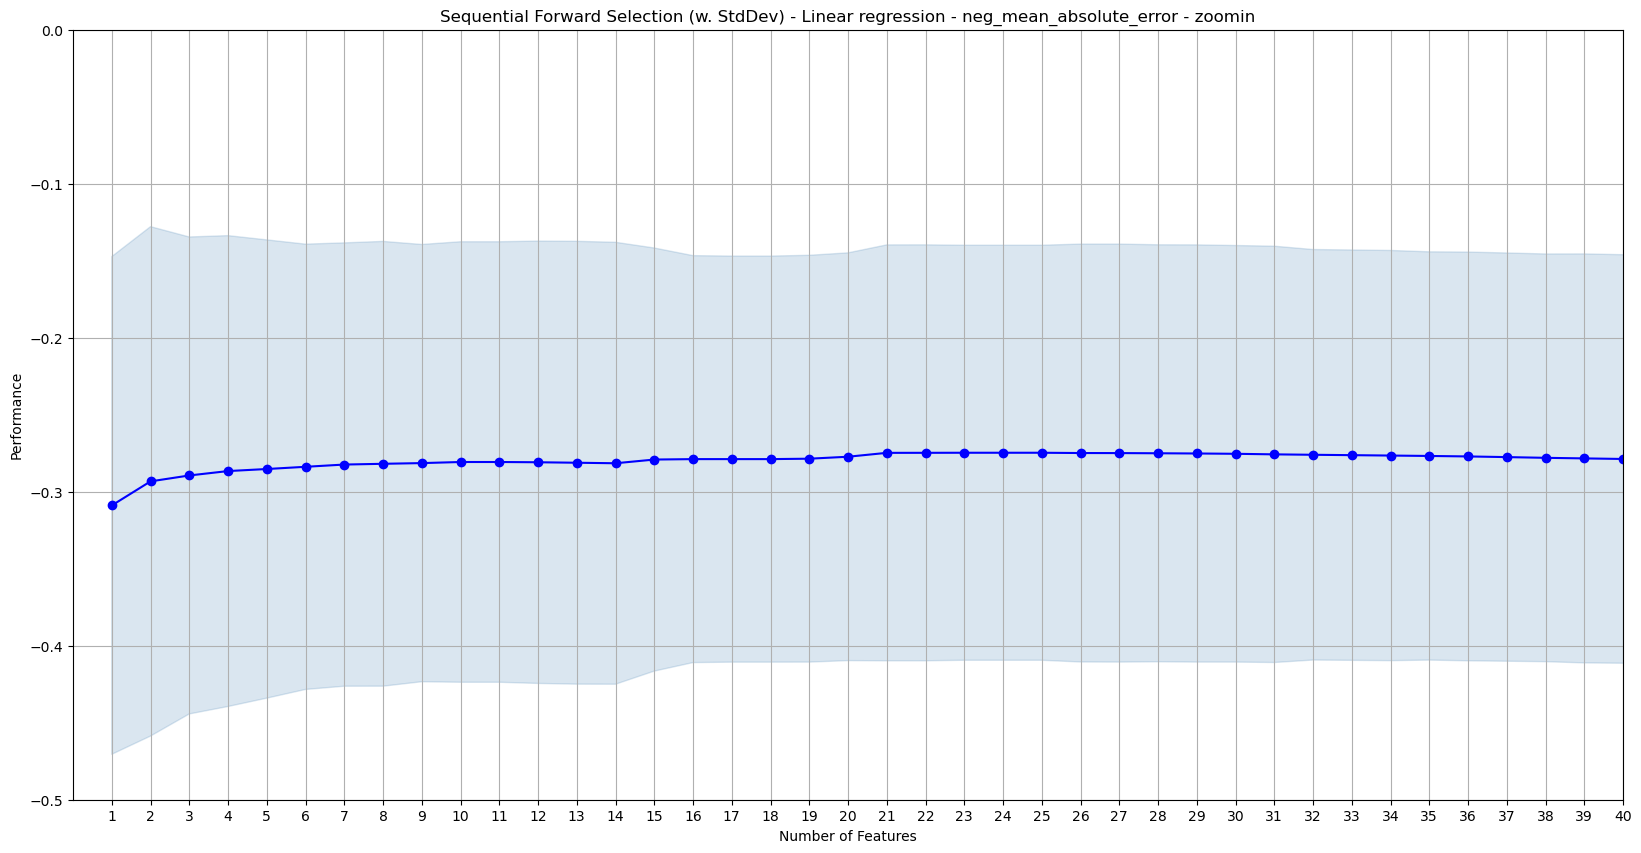

In [105]:
fig2 = plot_sfs(selected_features3.get_metric_dict(), figsize = (20,10), kind='std_dev')

plt.ylim([-0.5, 0])
plt.xlim([0,40])
plt.title('Sequential Forward Selection (w. StdDev) - Linear regression - neg_mean_absolute_error - zoomin')
plt.grid()
# plt.figure(figsize = (15,10))
plt.show()

In [110]:
l0 = ('cp', 'cmean', 'dstopsign', 'dvfpath', 'r_width_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_18', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_knr_8', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_6', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'carcount')
l1 = ('cp', 'cmax', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_5', 'z_qnr_23', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
l2 = ('cp', 'iemin', 'mew', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_10', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_8', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
l3 = ('cp', 'iemin', 'cmin', 'cmax', 'dcurb', 'dtrafficarea', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_7', 'z_qnr_9', 'z_qnr_15', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
l4 = ('cp', 'iemin', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_15', 'z_qnr_18', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_5', 'z_knr_8', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')


In [111]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(l0), 
                              'nmse_cv10':list(l1), 
                              'nmse_cv15':list(l2), 
                              'nmse_cv20':list(l3), 
                              'nmse_cv25':list(l4),
                              'r2_cv5':list(selected_features1.k_feature_names_), 
                              'r2_cv10':list(selected_features5.k_feature_names_), 
                              'r2_cv15':list(selected_features9.k_feature_names_), 
                              'r2_cv20':list(selected_features10.k_feature_names_), 
                              'nmedae_cv5':list(selected_features2.k_feature_names_), 
                              'nmedae_cv10':list(selected_features11.k_feature_names_), 
                              'nmedae_cv15':list(selected_features12.k_feature_names_), 
                              'nmedae_cv20':list(selected_features13.k_feature_names_), 
                              'nmeae_cv5':list(selected_features3.k_feature_names_), 
                              'nmeae_cv10':list(selected_features14.k_feature_names_), 
                              'nmeae_cv15':list(selected_features15.k_feature_names_), 
                              'nmeae_cv20':list(selected_features16.k_feature_names_)}

In [116]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [117]:
# df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/sffs_linearreg.csv', index = True)

In [ ]:
df_sf_linr_sffs

In [216]:
# selected_columns = list(l4)
selected_columns = list(selected_features16.k_feature_names_)
# selected_columns

# selected_features: linear regression, neg_mean_squared_error, cv = 5
# selected_features4: linear regression, neg_mean_squared_error, cv = 10
# selected_features6: linear regression, neg_mean_squared_error, cv = 15
# selected_features7: linear regression, neg_mean_squared_error, cv = 20
# selected_features8: linear regression, neg_mean_squared_error, cv = 25
# selected_features1: linear regression, r2, cv = 5
# selected_features5: linear regression, r2, cv = 10
# selected_features9: linear regression, r2, cv = 15
# selected_features10: linear regression, r2, cv = 20
# selected_features2: linear regression, neg_median_absolute_error, cv = 5
# selected_features11: linear regression, neg_median_absolute_error, cv = 10
# selected_features12: linear regression, neg_median_absolute_error, cv = 15
# selected_features13: linear regression, neg_median_absolute_error, cv = 20
# selected_features3: linear regression, neg_mean_absolute_error, cv = 5
# selected_features14: linear regression, neg_mean_absolute_error, cv = 10
# selected_features15: linear regression, neg_mean_absolute_error, cv = 15
# selected_features16: linear regression, neg_mean_absolute_error, cv = 20

In [217]:
# OLS
df_selected = dfacrpv[selected_columns]

m0 = sm.OLS(y, df_selected)
r0 = m0.fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     66.23
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.71e-171
Time:                        15:37:52   Log-Likelihood:                -222.50
No. Observations:                1087   AIC:                             487.0
Df Residuals:                    1066   BIC:                             591.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.2761      0.055     -5.015      0.000      -0.384      -0.168
cmax                 0.1410      0.027      5.173      0.000       0.087       0.194
r_width_value       -0.0891      0.019     -4.797      0.000      -0.126      -0.053
speedlimit_value    -0.0891      0.011     -7.961      0.000      -0.111      -0.067
curbtype_1           0.0818      0.029      2.825      0.005       0.025       0.139
curbtype_2          -0.0488      0.028     -1.772      0.077      -0.103       0.005
z_qnr_7              0.2464      0.066      3.739      0.000       0.117       0.376
z_qnr_12             0.1160      0.042      2.782      0.006       0.034       0.198
z_qnr_23            -0.2058      0.068     -3.045      0.002      -0.338      -0.073
z_qnr_31            -0.1661      0.085     -1.957      0.051      -0.333       0.000
z_knr_4              0.1679      0.033      5.050      0.000       0.103       0.233
z_knr_9              0.1869      0.033      5.683      0.000       0.122       0.251
trafficarea_2       -0.2365      0.037     -6.334      0.000      -0.310      -0.163
r_width_3            0.1258      0.045      2.769      0.006       0.037       0.215
r_width_4            0.1396      0.034      4.094      0.000       0.073       0.207
r_width_5            0.1749      0.035      4.949      0.000       0.106       0.244
r_width_6            0.1291      0.041      3.128      0.002       0.048       0.210
r_surface_1          0.1725      0.024      7.280      0.000       0.126       0.219
r_surface_2         -0.1395      0.052     -2.663      0.008      -0.242      -0.037
speedlimit_4         0.6939      0.028     24.681      0.000       0.639       0.749
speedlimit_5         0.0932      0.076      1.226      0.220      -0.056       0.242
speedlimit_6         0.4720      0.090      5.232      0.000       0.295       0.649
==============================================================================
Omnibus:                      144.188   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.946
Skew:                           0.823   Prob(JB):                     6.55e-59
Kurtosis:                       4.790   Cond. No.                     1.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
# # OLS
# df_selected = dfacrpv[selected_columns]
 
# X_train, X_test, y_train, y_test = train_test_split(
#         df_selected, y,
#         test_size=0.3,
#         random_state=0)

# m0 = sm.OLS(y_train, X_train)
# r0 = m0.fit()

In [103]:
# sm.graphics.influence_plot(r0)
# plt.show()

In [130]:
# ## Remove categorical
# cnq = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
#       'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
#       'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
#       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
#       'speedlimit_value', 'bicyclecount', 'carcount']
# x1 = dfacrpv[cnq]

# X_train, X_test, y_train, y_test = train_test_split(
#         x1, y,
#         test_size=0.3,
#         random_state=0)

# m1 = sm.OLS(y_train, X_train)
# r1 = m1.fit()

### Sequential backward floating selection

In [272]:
# Find the best size

# Scoring = neg_mean_squared_error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=False,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_mean_squared_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# sbfs3 = sfs.fit(x, y)

# # Scoring = r2
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features = 'best',
#                                 forward = False,
#                                 floating = True,
#                                 verbose = 0,
#                                 scoring='r2',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# sbfs7 = sfs.fit(x, y)

# # Scoring = median absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=False,
#                                 floating=True,
#                                 verbose = 0,
#                                 scoring='neg_median_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# sbfs11 = sfs.fit(x, y)

# Scoring = mean absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=False,
#                                 floating=True,
#                                 verbose = 0,
#                                 scoring='neg_mean_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# sbfs15 = sfs.fit(x, y)


In [120]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 5
# print(sbfs0.k_feature_names_)
# print(len(sbfs0.k_feature_names_))
# print(sbfs0.k_score_)
# 52

('cp', 'ie', 'iemax', 'mew', 'mewmin', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dtrainl', 'dplight', 'dcurb', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'z_qnr_2', 'z_qnr_5', 'z_qnr_8', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_30', 'z_knr_3', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
52
-0.13488390150205967


In [125]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 10
# print(sbfs1.k_feature_names_)
# print(len(sbfs1.k_feature_names_))
# print(sbfs1.k_score_)
# # 31

('cp', 'iemin', 'cmean', 'cmin', 'cmax', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_9', 'z_qnr_10', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_8', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_7', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
31
-0.10643822683056688


In [127]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 15
# print(sbfs2.k_feature_names_)
# print(len(sbfs2.k_feature_names_))
# print(sbfs2.k_score_)
# # 26

('cp', 'ie', 'cmax', 'dtraml', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_7', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'trafficarea_1', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
26
-0.1032668842651032


In [129]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 20
# print(sbfs3.k_feature_names_)
# print(len(sbfs3.k_feature_names_))
# print(sbfs3.k_score_)
# # 52

('cp', 'iemin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dtraml', 'dtrainl', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_16', 'z_qnr_18', 'z_qnr_21', 'z_qnr_23', 'z_qnr_25', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_6', 'z_knr_8', 'z_knr_9', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
52
-0.09949696696454327


In [139]:
# # n = best, linear regression, backward, scoring = r2, cv = 5
# print(sbfs4.k_feature_names_)
# print(len(sbfs4.k_feature_names_))
# print(sbfs4.k_score_)
# # 34

('cp', 'iemin', 'mewmax', 'megmax', 'cmean', 'cmin', 'cmax', 'dstopsign', 'dcurb', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_3', 'z_qnr_10', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_23', 'z_knr_3', 'z_knr_5', 'z_knr_7', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_6')
34
0.11079769269758852


In [143]:
# # n = best, linear regression, backward, scoring = r2, cv = 10
# print(sbfs5.k_feature_names_)
# print(len(sbfs5.k_feature_names_))
# print(sbfs5.k_score_)
# 64

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'meg', 'megmin', 'cmean', 'cmax', 'dtraml', 'dtrainl', 'dparkcar', 'dparktw', 'dtrafficarea', 'droad', 'gvm_dwv', 'gvm_msp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_10', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_7', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
64
0.04273746617428668


In [165]:
# # n = best, linear regression, backward, scoring = r2, cv = 15
# print(sbfs6.k_feature_names_)
# print(len(sbfs6.k_feature_names_))
# print(sbfs6.k_score_)
# # 42

('cmean', 'dtraml', 'dtrainl', 'dparkcar', 'gvm_dwv', 'gvm_asp', 'z_qnr_3', 'z_qnr_6', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_16', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_5', 'r_width_6', 'r_width_7', 'speedlimit_4', 'bicyclecount')
42
0.02725625356038412


In [174]:
# # n = best, linear regression, backward, scoring = r2, cv = 20
# print(sbfs7.k_feature_names_)
# print(len(sbfs7.k_feature_names_))
# print(sbfs7.k_score_)
# # 54

('cp', 'ie', 'iemax', 'mewmax', 'meg', 'megmax', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dtrainl', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_20', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'bicyclecount', 'carcount')
54
0.033345562541716625


In [178]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 5
# print(sbfs8.k_feature_names_)
# print(len(sbfs8.k_feature_names_))
# print(sbfs8.k_score_)
# # 14 

('z_qnr_7', 'z_qnr_8', 'z_qnr_16', 'z_qnr_22', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'trafficarea_2', 'r_width_4', 'r_width_7', 'r_surface_1', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
14
-0.14853296440410244


In [182]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 10
# print(sbfs9.k_feature_names_)
# print(len(sbfs9.k_feature_names_))
# print(sbfs9.k_score_)
# # 8

('z_qnr_2', 'z_qnr_22', 'trafficarea_2', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
8
-0.12379534658987487


In [252]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 15
# print(sbfs10.k_feature_names_)
# print(len(sbfs10.k_feature_names_))
# print(sbfs10.k_score_)
# # 14

('z_qnr_1', 'z_qnr_5', 'z_qnr_7', 'z_qnr_16', 'z_qnr_20', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_knr_9', 'trafficarea_3', 'r_width_4', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
14
-0.14787659233510794


In [254]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 20
# print(sbfs11.k_feature_names_)
# print(len(sbfs11.k_feature_names_))
# print(sbfs11.k_score_)
# # 9

('z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
9
-0.12273976660347483


In [256]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 5
# print(sbfs12.k_feature_names_)
# print(len(sbfs12.k_feature_names_))
# print(sbfs12.k_score_)
# # 24

('cp', 'cmean', 'cmax', 'dparkcar', 'dstopsign', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_3', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
24
-0.2746913055917502


In [265]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 10
# print(sbfs13.k_feature_names_)
# print(len(sbfs13.k_feature_names_))
# print(sbfs13.k_score_)
# # 19

('dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_26', 'z_knr_4', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
19
-0.23174655931933885


In [269]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 15
# print(sbfs14.k_feature_names_)
# print(len(sbfs14.k_feature_names_))
# print(sbfs14.k_score_)
# # 25

('cp', 'cmin', 'cmax', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_2', 'z_qnr_26', 'z_qnr_33', 'trafficarea_1', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
25
-0.22465438666708354


In [273]:
# n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 20
print(sbfs15.k_feature_names_)
print(len(sbfs15.k_feature_names_))
print(sbfs15.k_score_)
# 

('cp', 'cmax', 'dtrafficarea', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_4', 'z_qnr_7', 'z_qnr_12', 'z_qnr_23', 'z_qnr_26', 'z_qnr_27', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
27
-0.21784234546141795


In [276]:
selected_columns_linr_sbfs = []
selected_columns_linr_sbfs = {'all': cn,
                              'nmse_cv5':list(sbfs0.k_feature_names_), 
                              'nmse_cv10':list(sbfs1.k_feature_names_), 
                              'nmse_cv15':list(sbfs2.k_feature_names_), 
                              'nmse_cv20':list(sbfs3.k_feature_names_), 
                              'r2_cv5':list(sbfs4.k_feature_names_), 
                              'r2_cv10':list(sbfs5.k_feature_names_), 
                              'r2_cv15':list(sbfs6.k_feature_names_), 
                              'r2_cv20':list(sbfs7.k_feature_names_), 
                              'nmedae_cv5':list(sbfs8.k_feature_names_), 
                              'nmedae_cv10':list(sbfs9.k_feature_names_), 
                              'nmedae_cv15':list(sbfs10.k_feature_names_), 
                              'nmedae_cv20':list(sbfs11.k_feature_names_), 
                              'nmeae_cv5':list(sbfs12.k_feature_names_), 
                              'nmeae_cv10':list(sbfs13.k_feature_names_), 
                              'nmeae_cv15':list(sbfs14.k_feature_names_), 
                              'nmeae_cv20':list(sbfs15.k_feature_names_)}

In [280]:
df_sf_linr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sbfs.items()]))

In [281]:
# df_sf_linr_sbfs.to_csv('/home/yelhe/script/mtp/tables/sbfs_linearreg.csv', index = True)

In [274]:
sbfs_columns = list(sbfs15.k_feature_names_)


In [275]:
# OLS
df_selected = dfacrpv[sbfs_columns]
 
# X_train, X_test, y_train, y_test = train_test_split(
#         df_selected, y,
#         test_size=0.3,
#         random_state=0)

m1 = sm.OLS(y, df_selected)
r1 = m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     60.58
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.92e-184
Time:                        17:35:11   Log-Likelihood:                -179.46
No. Observations:                1087   AIC:                             410.9
Df Residuals:                    1061   BIC:                             540.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.2599      0.053     -4.877      0.000      -0.364      -0.155
cmax                 0.1348      0.026      5.106      0.000       0.083       0.187
dtrafficarea         0.0363      0.013      2.839      0.005       0.011       0.061
r_width_value       -0.1081      0.016     -6.620      0.000      -0.140      -0.076
speedlimit_value    -0.3160      0.033     -9.632      0.000      -0.380      -0.252
curbtype_1           0.5906      0.028     20.852      0.000       0.535       0.646
curbtype_2           0.4588      0.029     16.023      0.000       0.403       0.515
z_qnr_4             -0.0359      0.053     -0.678      0.498      -0.140       0.068
z_qnr_7              0.2213      0.064      3.457      0.001       0.096       0.347
z_qnr_12             0.1118      0.040      2.768      0.006       0.033       0.191
z_qnr_23            -0.2065      0.065     -3.166      0.002      -0.334      -0.079
z_qnr_26            -0.3230      0.090     -3.581      0.000      -0.500      -0.146
z_qnr_27            -0.0152      0.093     -0.163      0.870      -0.197       0.167
z_knr_4              0.1859      0.033      5.698      0.000       0.122       0.250
z_knr_9              0.1705      0.032      5.279      0.000       0.107       0.234
trafficarea_2       -0.3231      0.038     -8.435      0.000      -0.398      -0.248
r_width_1           -0.1599      0.026     -6.186      0.000      -0.211      -0.109
r_width_2           -0.2547      0.042     -6.058      0.000      -0.337      -0.172
r_width_3            0.0053      0.031      0.172      0.863      -0.055       0.065
r_width_7           -0.3282      0.062     -5.287      0.000      -0.450      -0.206
r_surface_1          0.6620      0.026     25.479      0.000       0.611       0.713
r_surface_2          0.3874      0.051      7.596      0.000       0.287       0.487
speedlimit_1        -0.7685      0.037    -20.565      0.000      -0.842      -0.695
speedlimit_2        -1.3059      0.089    -14.661      0.000      -1.481      -1.131
speedlimit_3        -0.6970      0.030    -23.143      0.000      -0.756      -0.638
speedlimit_5        -0.4634      0.078     -5.963      0.000      -0.616      -0.311
speedlimit_6        -0.2225      0.088     -2.543      0.011      -0.394      -0.051
==============================================================================
Omnibus:                       84.291   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.828
Skew:                           0.393   Prob(JB):                     1.02e-51
Kurtosis:                       5.137   Cond. No.                     1.89e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

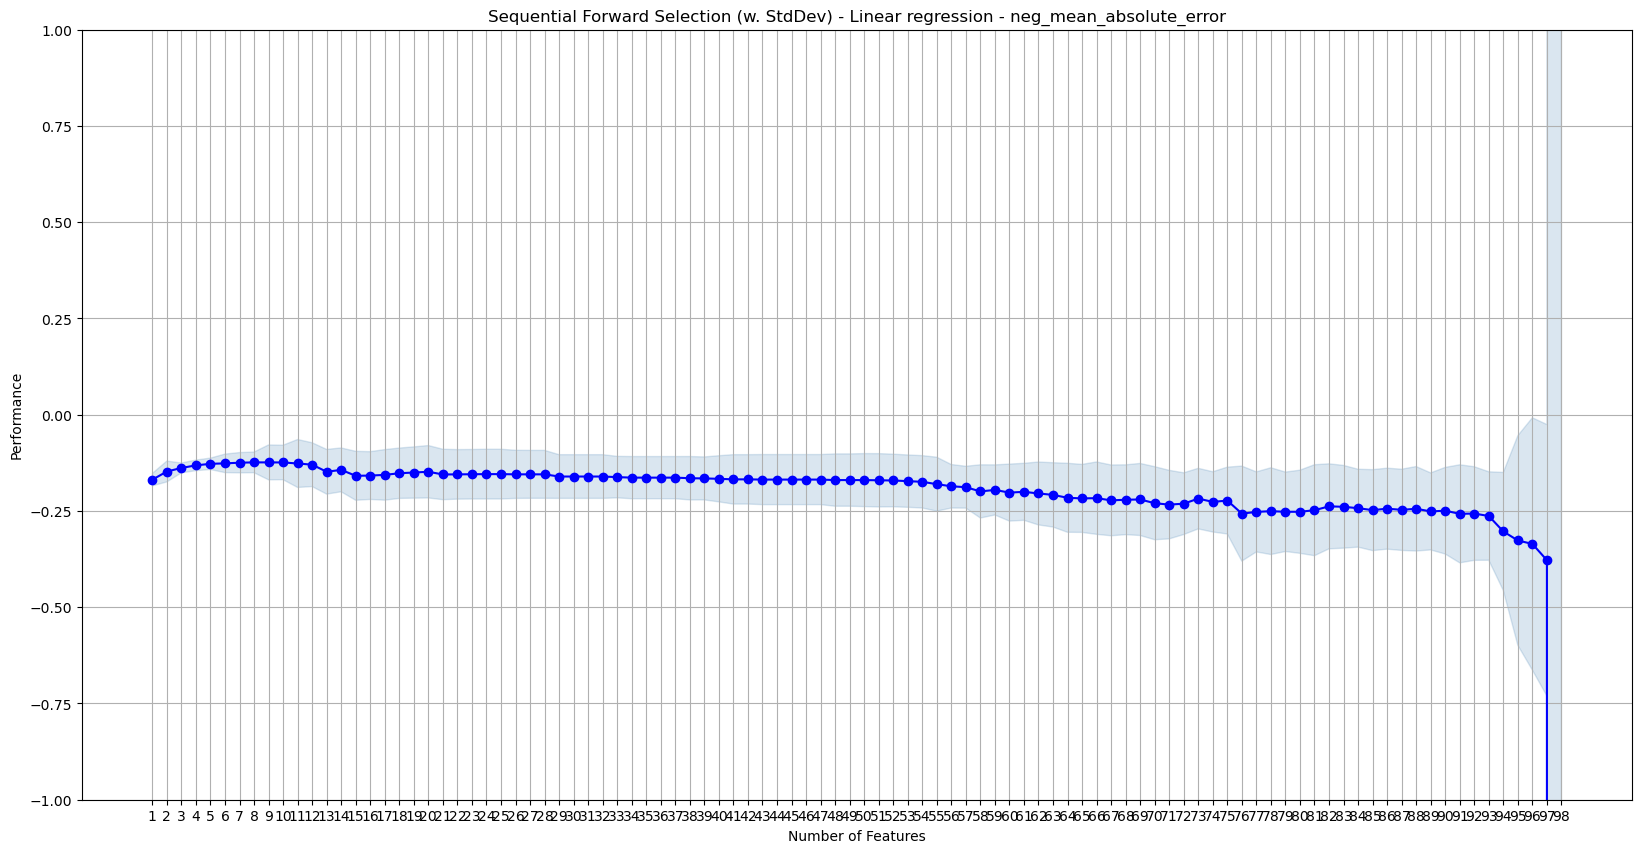

In [251]:
fig3 = plot_sfs(sbfs9.get_metric_dict(), figsize = (20,10), kind='std_dev')

plt.ylim([-1, 1])
plt.title('Sequential Forward Selection (w. StdDev) - Linear regression - neg_mean_absolute_error')
plt.grid()
plt.show()

## Logistic Regression model

In [38]:
# Errors in the following parts: logistic regression is not a regressor but a classifier! 
# Therefore the scoring for linear regression shouldn't been used here
# Correction here

# Scoring  =  accuracy, f1, precision, recall,(roc_auc) 


### Sequential forward floating selection

In [44]:
def featureselection(direction, score, cvn, x, y):
    sfs = SequentialFeatureSelector(linear_model.LogisticRegression(max_iter = 400),
                                k_features='best',
                                forward=direction,
                                floating=True,
                                verbose = 0, # check logging
                                scoring=score,
                                cv=cvn
#                                     ,
#                                 n_jobs = -1 # For parallel
                               )
    sfsr = sfs.fit(x, y)
    return sfsr

In [81]:
# n = best, logistic regression, scoring = accuracy, cv = 5
# sffslog0 = featureselection(True, 'accuracy', 5, x, y)
print(sffslog0.k_feature_names_)
print(len(sffslog0.k_feature_names_))
print(sffslog0.k_score_)
#

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'dstation', 'dpedcro', 'dcurb', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_16', 'z_qnr_22', 'z_qnr_23', 'z_qnr_25', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_2', 'z_knr_6', 'z_knr_9', 'z_knr_11', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
57
0.8896038557476853


In [178]:
# # # n = best, logistic regression, scoring = accuracy, cv = 10
# sffslog1 = featureselection(True, 'accuracy', 10, x, y)
# print(sffslog1.k_feature_names_)
# print(len(sffslog1.k_feature_names_))
# print(sffslog1.k_score_)
# #

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmax', 'dbusl', 'dtrainl', 'dstation', 'dpedcro', 'dtrafficarea', 'droad', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'speedlimit_value', 'curbtype_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_16', 'z_qnr_20', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_2', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
64
-0.10772171253822631


In [179]:
# # # n = best, logistic regression, scoring = accuracy, cv = 15
# sffslog2 = featureselection(True, 'accuracy', 15, x, y)
# print(sffslog2.k_feature_names_)
# print(len(sffslog2.k_feature_names_))
# print(sffslog2.k_score_)
# #

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtrainl', 'dparkcar', 'dtrafficarea', 'droad', 'dvfpath', 'curbtype_1', 'curbtype_2', 'z_qnr_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
64
-0.11042617960426179


In [180]:
# # # n = best, logistic regression, scoring = accuracy, cv = 20
# sffslog3 = featureselection(True, 'accuracy', 20, x, y)
# print(sffslog3.k_feature_names_)
# print(len(sffslog3.k_feature_names_))
# print(sffslog3.k_score_)
# #

('cp', 'ie', 'iemin', 'mew', 'meg', 'megmin', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_8', 'z_knr_9', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount')
81
-0.1001851851851852


In [ ]:
# selected_columns_logr_sffs_p1 = []
# selected_columns_logr_sffs_p1 = {'all': cn,
#                               'acc_cv5':list(sffslog0.k_feature_names_), 
#                               'acc_cv10':list(sffslog1.k_feature_names_), 
#                               'acc_cv15':list(sffslog2.k_feature_names_), 
#                               'acc_cv20':list(sffslog3.k_feature_names_)
#                               }
# df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs_p1.items()]))
# df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/sffs_logisticreg_part1_acc.csv', index = True)

In [47]:
selected_columns_logr_sffs_p01 = []
selected_columns_logr_sffs_p01 = {'all': cn,
                              'acc_cv5':list(sffslog0.k_feature_names_)
#                               'acc_cv10':list(sffslog1.k_feature_names_), 
#                               'acc_cv15':list(sffslog2.k_feature_names_), 
#                               'acc_cv20':list(sffslog3.k_feature_names_)
                              }
df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs_p01.items()]))
df_sf_logr_sffs.to_csv('../MTP/sffs_logisticreg_part01_acc.csv', index = True)

In [187]:
# # # n = best, logistic regression, scoring = f1, cv = 5
# sffslog4 = featureselection(True, 'f1', 5, x, y)
# print(sffslog4.k_feature_names_)
# print(len(sffslog4.k_feature_names_))
# print(sffslog4.k_score_)
# #

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dplight', 'dstation', 'dparktw', 'dpedcro', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_16', 'z_qnr_17', 'z_qnr_23', 'z_qnr_25', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_1', 'z_knr_6', 'z_knr_9', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount')
62
0.41847324041727224


In [188]:
# # # n = best, logistic regression, scoring = f1, cv = 10
# sffslog5 = featureselection(True, 'f1', 10, x, y)
# print(sffslog5.k_feature_names_)
# print(len(sffslog5.k_feature_names_))
# print(sffslog5.k_score_)
# #

('cp', 'iemax', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'dtrainl', 'dparkcar', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_20', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_2', 'z_knr_4', 'z_knr_6', 'z_knr_8', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_surface_1', 'r_surface_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'carcount')
52
0.4597237378146371


In [189]:
# # # n = best, logistic regression, scoring = f1, cv = 15
# sffslog6 = featureselection(True, 'f1', 15, x, y)
# print(sffslog6.k_feature_names_)
# print(len(sffslog6.k_feature_names_))
# print(sffslog6.k_score_)
# #

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'dplight', 'dparkcar', 'droad', 'dvfpath', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_23', 'z_qnr_26', 'z_qnr_28', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_2', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
56
0.4961413693886387


In [190]:
# # # n = best, logistic regression, scoring = f1, cv = 20
# sffslog7 = featureselection(True, 'f1', 20, x, y)
# print(sffslog7.k_feature_names_)
# print(len(sffslog7.k_feature_names_))
# print(sffslog7.k_score_)
# #

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dpedcro', 'dstopsign', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_3', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_18', 'z_qnr_19', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
79
0.5131501831501828


In [191]:
# selected_columns_logr_sffs_p2 = []
# selected_columns_logr_sffs_p2 = {'all': cn,
#                               'r2_cv5':list(sffslog4.k_feature_names_), 
#                               'r2_cv10':list(sffslog5.k_feature_names_), 
#                               'r2_cv15':list(sffslog6.k_feature_names_), 
#                               'r2_cv20':list(sffslog7.k_feature_names_)
#                               }
# df_sf_logr_sffs_p2 = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs_p2.items()]))
# df_sf_logr_sffs_p2.to_csv('/home/yelhe/script/mtp/tables/sffs_logisticreg_part2_f1.csv', index = True)

In [192]:
# # # n = best, logistic regression, scoring = precision, cv = 5
# sffslog8 = featureselection(True, 'precision', 5, x, y)
# print(sffslog8.k_feature_names_)
# print(len(sffslog8.k_feature_names_))
# print(sffslog8.k_score_)
# #

('cp',)
1
0.0


In [193]:
# # # n = best, logistic regression, scoring = precision, cv = 10
# sffslog9 = featureselection(True, 'precision', 10, x, y)
# print(sffslog9.k_feature_names_)
# print(len(sffslog9.k_feature_names_))
# print(sffslog9.k_score_)
# #

('cp',)
1
0.0


In [194]:
# # # n = best, logistic regression, scoring = precision, cv = 15
# sffslog10 = featureselection(True, 'precision', 15, x, y)
# print(sffslog10.k_feature_names_)
# print(len(sffslog10.k_feature_names_))
# print(sffslog10.k_score_)
# #

('cp',)
1
0.0


In [195]:
# # # n = best, logistic regression, scoring = precision, cv = 20
# sffslog11 = featureselection(True, 'precision', 20, x, y)
# print(sffslog11.k_feature_names_)
# print(len(sffslog11.k_feature_names_))
# print(sffslog11.k_score_)
# #

('cp',)
1
0.0


In [196]:
# selected_columns_logr_sffs_p3 = []
# selected_columns_logr_sffs_p3 = {'all': cn,
#                               'nmedae_cv5':list(sffslog8.k_feature_names_), 
#                               'nmedae_cv10':list(sffslog9.k_feature_names_), 
#                               'nmedae_cv15':list(sffslog10.k_feature_names_), 
#                               'nmedae_cv20':list(sffslog11.k_feature_names_)
#                               }
# df_sf_logr_sffs_p3 = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs_p3.items()]))
# df_sf_logr_sffs_p3.to_csv('/home/yelhe/script/mtp/tables/sffs_logisticreg_part3_pre.csv', index = True)

In [197]:
# # # n = best, logistic regression, scoring = recall, cv = 5
# sffslog12 = featureselection(True, 'recall', 5, x, y)
# print(sffslog12.k_feature_names_)
# print(len(sffslog12.k_feature_names_))
# print(sffslog12.k_score_)
# #

('cp', 'iemin', 'iemax', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dpedcro', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'speedlimit_value', 'curbtype_1', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_16', 'z_qnr_22', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_4', 'z_knr_6', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'r_surface_2', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6')
58
-0.11317803238489832


In [198]:
# # # n = best, logistic regression, scoring = recall, cv = 10
# sffslog13 = featureselection(True, 'recall', 10, x, y)
# print(sffslog13.k_feature_names_)
# print(len(sffslog13.k_feature_names_))
# print(sffslog13.k_score_)
# #

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmax', 'dbusl', 'dtrainl', 'dstation', 'dpedcro', 'dtrafficarea', 'droad', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'speedlimit_value', 'curbtype_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_16', 'z_qnr_20', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_2', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
64
-0.10772171253822631


In [199]:
# # # n = best, logistic regression, scoring = recall, cv = 15
# sffslog14 = featureselection(True, 'recall', 15, x, y)
# print(sffslog14.k_feature_names_)
# print(len(sffslog14.k_feature_names_))
# print(sffslog14.k_score_)
# #

('cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtrainl', 'dparkcar', 'dtrafficarea', 'droad', 'dvfpath', 'curbtype_1', 'curbtype_2', 'z_qnr_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount')
64
-0.11042617960426179


In [200]:
# # # n = best, logistic regression, scoring = recall, cv = 20
# sffslog15 = featureselection(True, 'recall', 20, x, y)
# print(sffslog15.k_feature_names_)
# print(len(sffslog15.k_feature_names_))
# print(sffslog15.k_score_)
# #

('cp', 'ie', 'iemin', 'mew', 'meg', 'megmin', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_asp', 'r_width_value', 'speedlimit_value', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_6', 'z_knr_8', 'z_knr_9', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1', 'speedlimit_2', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount')
81
-0.1001851851851852


In [201]:
# selected_columns_logr_sffs_p4 = []
# selected_columns_logr_sffs_p4 = {'all': cn,
#                               'nmeae_cv5':list(sffslog12.k_feature_names_), 
#                               'nmeae_cv10':list(sffslog13.k_feature_names_), 
#                               'nmeae_cv15':list(sffslog14.k_feature_names_), 
#                               'nmeae_cv20':list(sffslog15.k_feature_names_)
#                               }
# df_sf_logr_sffs_p4 = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs_p4.items()]))
# df_sf_logr_sffs_p4.to_csv('/home/yelhe/script/mtp/tables/sffs_logisticreg_part4_rec.csv', index = True)

In [202]:
# # For all 
# selected_columns_logr_sffs = []
# selected_columns_logr_sffs = {'all': cn,
#                               'acc_cv5':list(sffslog0.k_feature_names_), 
#                               'acc_cv10':list(sffslog1.k_feature_names_), 
#                               'acc_cv15':list(sffslog2.k_feature_names_),
#                               'acc_cv20':list(sffslog3.k_feature_names_),
#                               'f1_cv5':list(sffslog4.k_feature_names_), 
#                               'f1_cv10':list(sffslog5.k_feature_names_), 
#                               'f1_cv15':list(sffslog6.k_feature_names_), 
#                               'f1_cv20':list(sffslog7.k_feature_names_),
#                               'pre_cv5':list(sffslog8.k_feature_names_), 
#                               'pre_cv10':list(sffslog9.k_feature_names_), 
#                               'pre_cv15':list(sffslog10.k_feature_names_), 
#                               'pre_cv20':list(sffslog11.k_feature_names_),
#                               'rec_cv5':list(sffslog12.k_feature_names_), 
#                               'rec_cv10':list(sffslog13.k_feature_names_), 
#                               'rec_cv15':list(sffslog14.k_feature_names_), 
#                               'rec_cv20':list(sffslog15.k_feature_names_)
#                               }
# df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs.items()]))
# df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/sffs_logisticreg.csv', index = True)

### Sequential backward floating selection

In [ ]:
# n = best, logistic regression, scoring = accuracy, cv = 5
sbfslog0 = featureselection(False, 'accuracy', 5, x, y)
print(sbfslog0.k_feature_names_)
print(len(sbfslog0.k_feature_names_))
print(sbfslog0.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = accuracy, cv = 10
sbfslog1 = featureselection(False, 'accuracy', 10, x, y)
print(sbfslog1.k_feature_names_)
print(len(sbfslog1.k_feature_names_))
print(sbfslog1.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = accuracy, cv = 15
sbfslog2 = featureselection(False, 'accuracy', 15, x, y)
print(sbfslog2.k_feature_names_)
print(len(sbfslog2.k_feature_names_))
print(sbfslog2.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = accuracy, cv = 20
sbfslog3 = featureselection(False, 'accuracy', 20, x, y)
print(sbfslog3.k_feature_names_)
print(len(sbfslog3.k_feature_names_))
print(sbfslog3.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = f1, cv = 5
sbfslog4 = featureselection(False, 'f1', 5, x, y)
print(sbfslog4.k_feature_names_)
print(len(sbfslog4.k_feature_names_))
print(sbfslog4.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = f1, cv = 10
sbfslog5 = featureselection(False, 'f1', 10, x, y)
print(sbfslog5.k_feature_names_)
print(len(sbfslog5.k_feature_names_))
print(sbfslog5.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = f1, cv = 15
sbfslog6 = featureselection(False, 'f1', 15, x, y)
print(sbfslog6.k_feature_names_)
print(len(sbfslog6.k_feature_names_))
print(sbfslog6.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = f1, cv = 20
sbfslog7 = featureselection(False, 'f1', 20, x, y)
print(sbfslog7.k_feature_names_)
print(len(sbfslog7.k_feature_names_))
print(sbfslog7.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = precision, cv = 5
sbfslog8 = featureselection(False, 'precision', 5, x, y)
print(sbfslog8.k_feature_names_)
print(len(sbfslog8.k_feature_names_))
print(sbfslog8.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = precision, cv = 10
sbfslog9 = featureselection(False, 'precision', 10, x, y)
print(sbfslog9.k_feature_names_)
print(len(sbfslog9.k_feature_names_))
print(sbfslog9.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = precision, cv = 15
sbfslog10 = featureselection(False, 'precision', 15, x, y)
print(sbfslog10.k_feature_names_)
print(len(sbfslog10.k_feature_names_))
print(sbfslog10.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = precision, cv = 20
sbfslog11 = featureselection(False, 'precision', 20, x, y)
print(sbfslog11.k_feature_names_)
print(len(sbfslog11.k_feature_names_))
print(sbfslog11.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = recall, cv = 5
sbfslog12 = featureselection(False, 'recall', 5, x, y)
print(sbfslog12.k_feature_names_)
print(len(sbfslog12.k_feature_names_))
print(sbfslog12.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = recall, cv = 10
sbfslog13 = featureselection(False, 'recall', 10, x, y)
print(sbfslog13.k_feature_names_)
print(len(sbfslog13.k_feature_names_))
print(sbfslog13.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = recall, cv = 15
sbfslog14 = featureselection(False, 'recall', 15, x, y)
print(sbfslog14.k_feature_names_)
print(len(sbfslog14.k_feature_names_))
print(sbfslog14.k_score_)
#

In [ ]:
# n = best, logistic regression, scoring = recall, cv = 20
sbfslog15 = featureselection(False, 'recall', 20, x, y)
print(sbfslog15.k_feature_names_)
print(len(sbfslog15.k_feature_names_))
print(sbfslog15.k_score_)
#

In [ ]:
# # For all 
# selected_columns_logr_sbfs = []
# selected_columns_logr_sbfs = {'all': cn,
#                               'acc_cv5':list(sbfslog0.k_feature_names_), 
#                               'acc_cv10':list(sbfslog1.k_feature_names_), 
#                               'acc_cv15':list(sbfslog2.k_feature_names_),
#                               'acc_cv20':list(sbfslog3.k_feature_names_),
#                               'f1_cv5':list(sbfslog4.k_feature_names_), 
#                               'f1_cv10':list(sbfslog5.k_feature_names_), 
#                               'f1_cv15':list(sbfslog6.k_feature_names_), 
#                               'f1_cv20':list(sbfslog7.k_feature_names_),
#                               'pre_cv5':list(sbfslog8.k_feature_names_), 
#                               'pre_cv10':list(sbfslog9.k_feature_names_), 
#                               'pre_cv15':list(sbfslog10.k_feature_names_), 
#                               'pre_cv20':list(sbfslog11.k_feature_names_),
#                               'rec_cv5':list(sbfslog12.k_feature_names_), 
#                               'rec_cv10':list(sbfslog13.k_feature_names_), 
#                               'rec_cv15':list(sbfslog14.k_feature_names_), 
#                               'rec_cv20':list(sbfslog15.k_feature_names_)
#                               }
# df_sf_logr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sbfs.items()]))
# df_sf_logr_sbfs.to_csv('/home/yelhe/script/mtp/tables/sbfs_logisticreg.csv', index = True)

# Correlation analysis

In [34]:
dfv = dfacrpv[cn]

In [35]:

corr_matrix = dfv.corr()
# plt.figure(figsize=(50,50))
# sn.set(font_scale = 0.5)
# sn.heatmap(corr_matrix, annot = True, )
# # plt.savefig('fig_corrmat_ols.png')
# plt.show()




In [52]:
# corr_matrix

In [39]:
sorted_corrmat = corr_matrix.unstack().sort_values()

In [45]:
upper_corrmat = corr_matrix.where(
                np.triu(np.ones(corr_matrix.shape),k = 1).astype(bool))
unique_corrpair = upper_corrmat.unstack().dropna()
sorted_uni_cp = unique_corrpair.sort_values()

In [49]:
dfsucp = sorted_uni_cp.to_frame()

In [50]:
# dfsucp.to_csv('../MTP/sorted_unique_corrpairs.csv', index = True)

In [75]:
cng1 = ['cp', 'cmean', 'cmin', 'cmax']
cng2 = ['ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
        'megmin', 'megmax']
cng3 = ['dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 
        'dparktw', 'dpedcro', 'dstopsign', 'dcurb','dtrafficarea', 'droad', 
        'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
        'speedlimit_value', 'bicyclecount', 'carcount']
cng4 = ['curbtype_1', 'curbtype_2', 'trafficarea_1', 'trafficarea_2',
        'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
        'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
        'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
        'speedlimit_5', 'speedlimit_6']
cng5 = ['z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
        'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
        'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
        'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
        'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
        'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
        'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
        'z_knr_10', 'z_knr_11', 'z_knr_12']

In [56]:
# corr_matrix.to_csv('../MTP/corr_matrix.csv', index = True)

In [51]:
# dfv1 = dfacrpv[cng1]
# corr_matrix1 = dfv1.corr()
# # plt.figure(figsize=(50,50))
# # sn.set(font_scale = 0.5)
# sn.heatmap(corr_matrix1, annot = True, )
# # plt.savefig('fig_corrmat_1.png')
# plt.show()


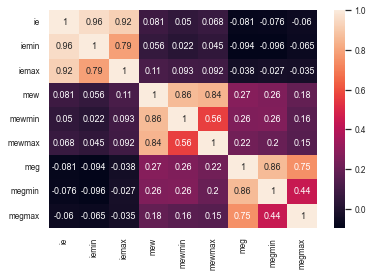

In [69]:
dfv2 = dfacrpv[cng2]
corr_matrix2 = dfv2.corr()
# plt.figure(figsize=(50,50))
sn.set(font_scale = 0.75)
sn.heatmap(corr_matrix2, annot = True, )
plt.savefig('fig_corrmat_2.png')
plt.show()


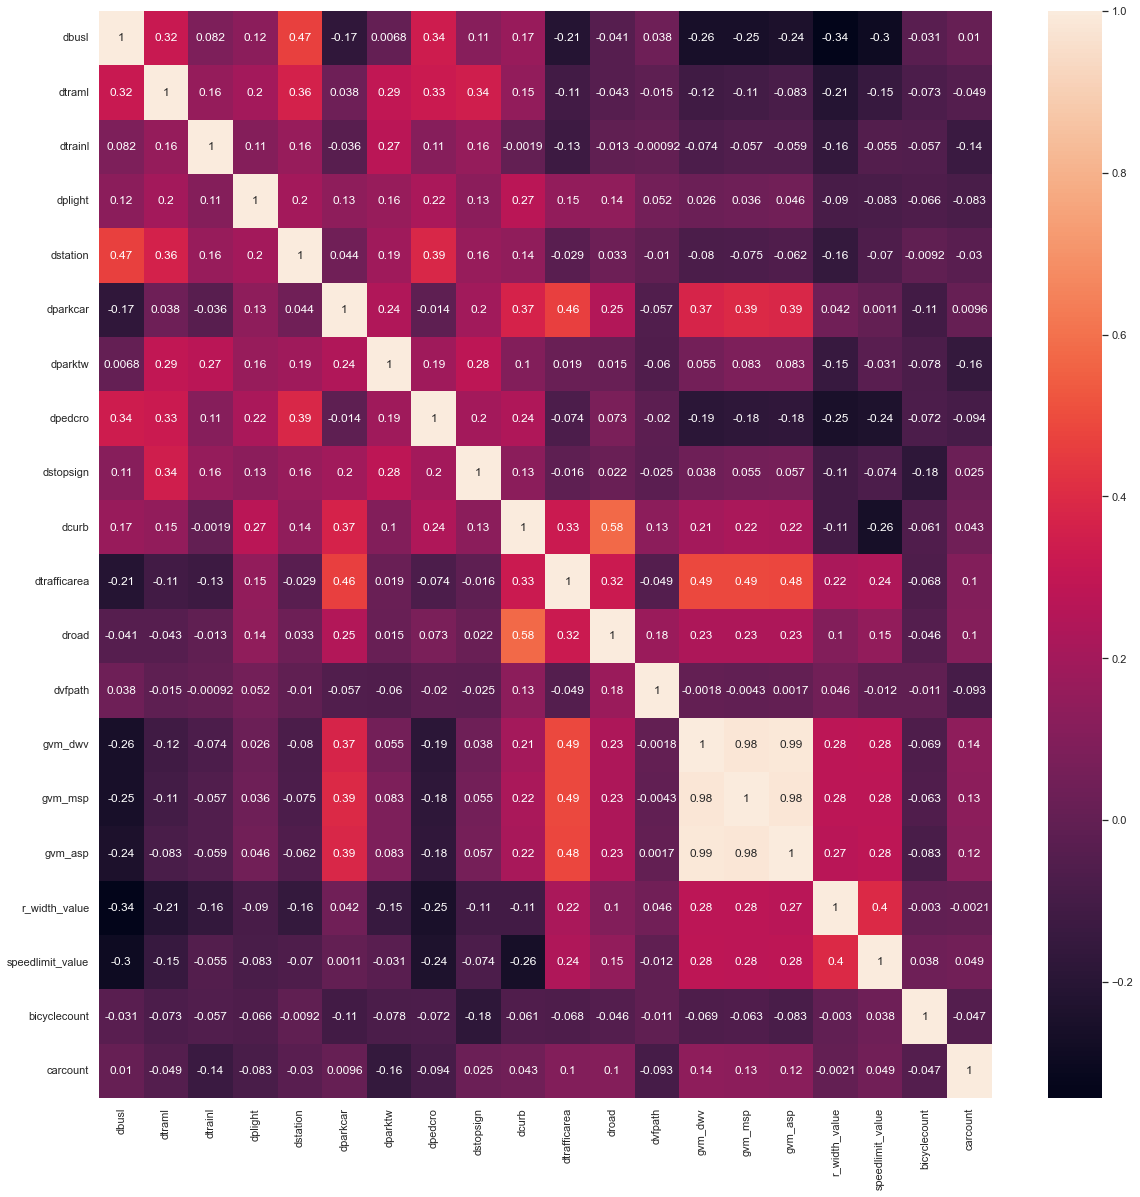

In [70]:
dfv3 = dfacrpv[cng3]
corr_matrix3 = dfv3.corr()
plt.figure(figsize=(20,20))
sn.set(font_scale = 1)
sn.heatmap(corr_matrix3, annot = True, )
plt.savefig('fig_corrmat_3.png')
plt.show()


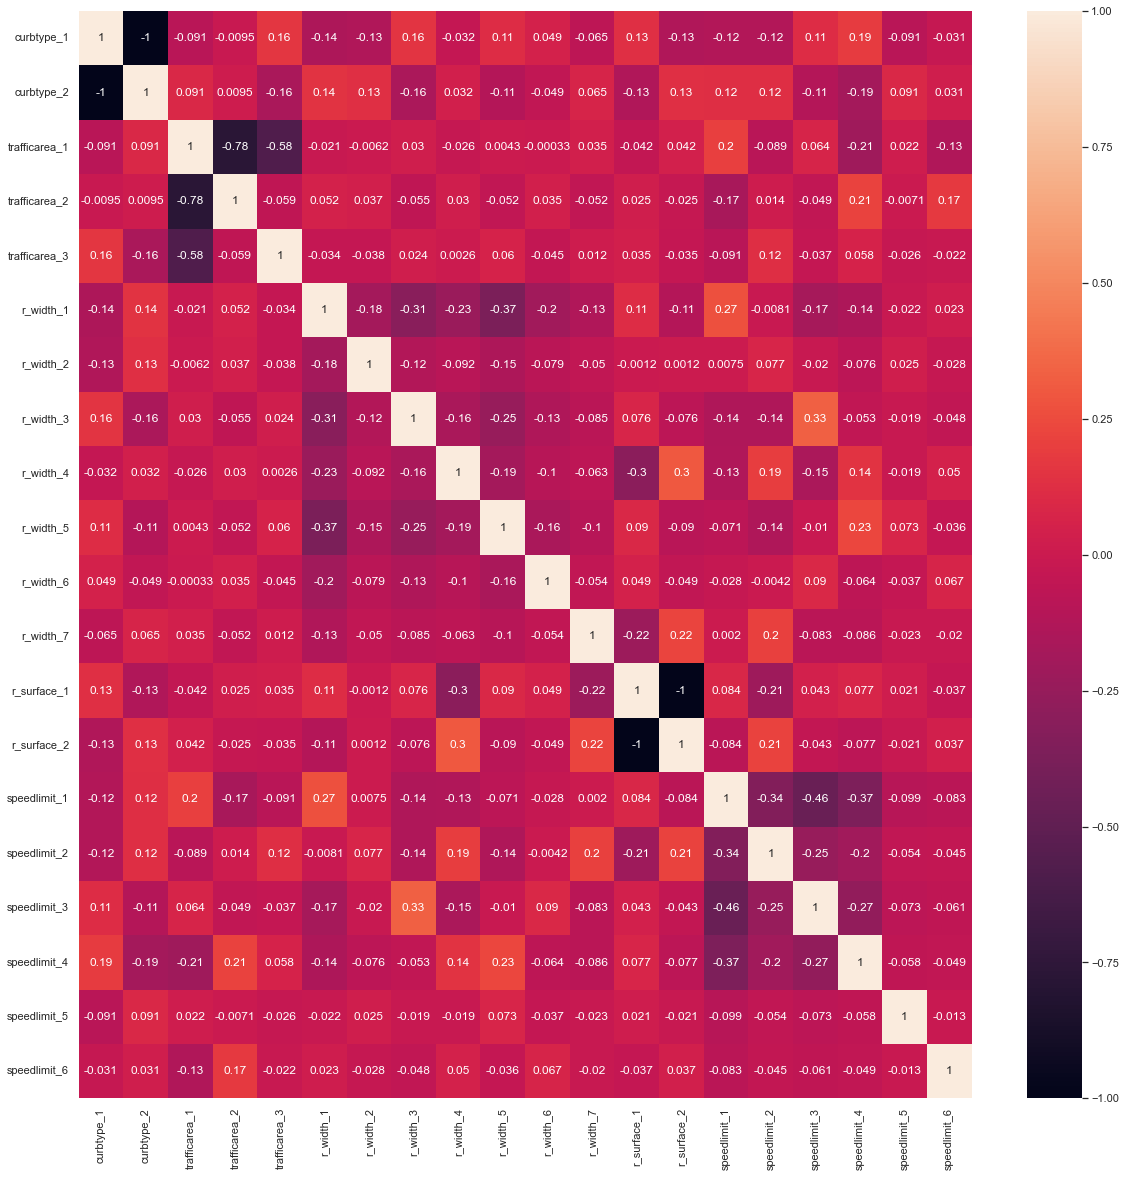

In [78]:
dfv4 = dfacrpv[cng4]
corr_matrix4 = dfv4.corr()
plt.figure(figsize=(20,20))
sn.set(font_scale = 1)
sn.heatmap(corr_matrix4, annot = True, )
plt.savefig('fig_corrmat_4.png')
plt.show()


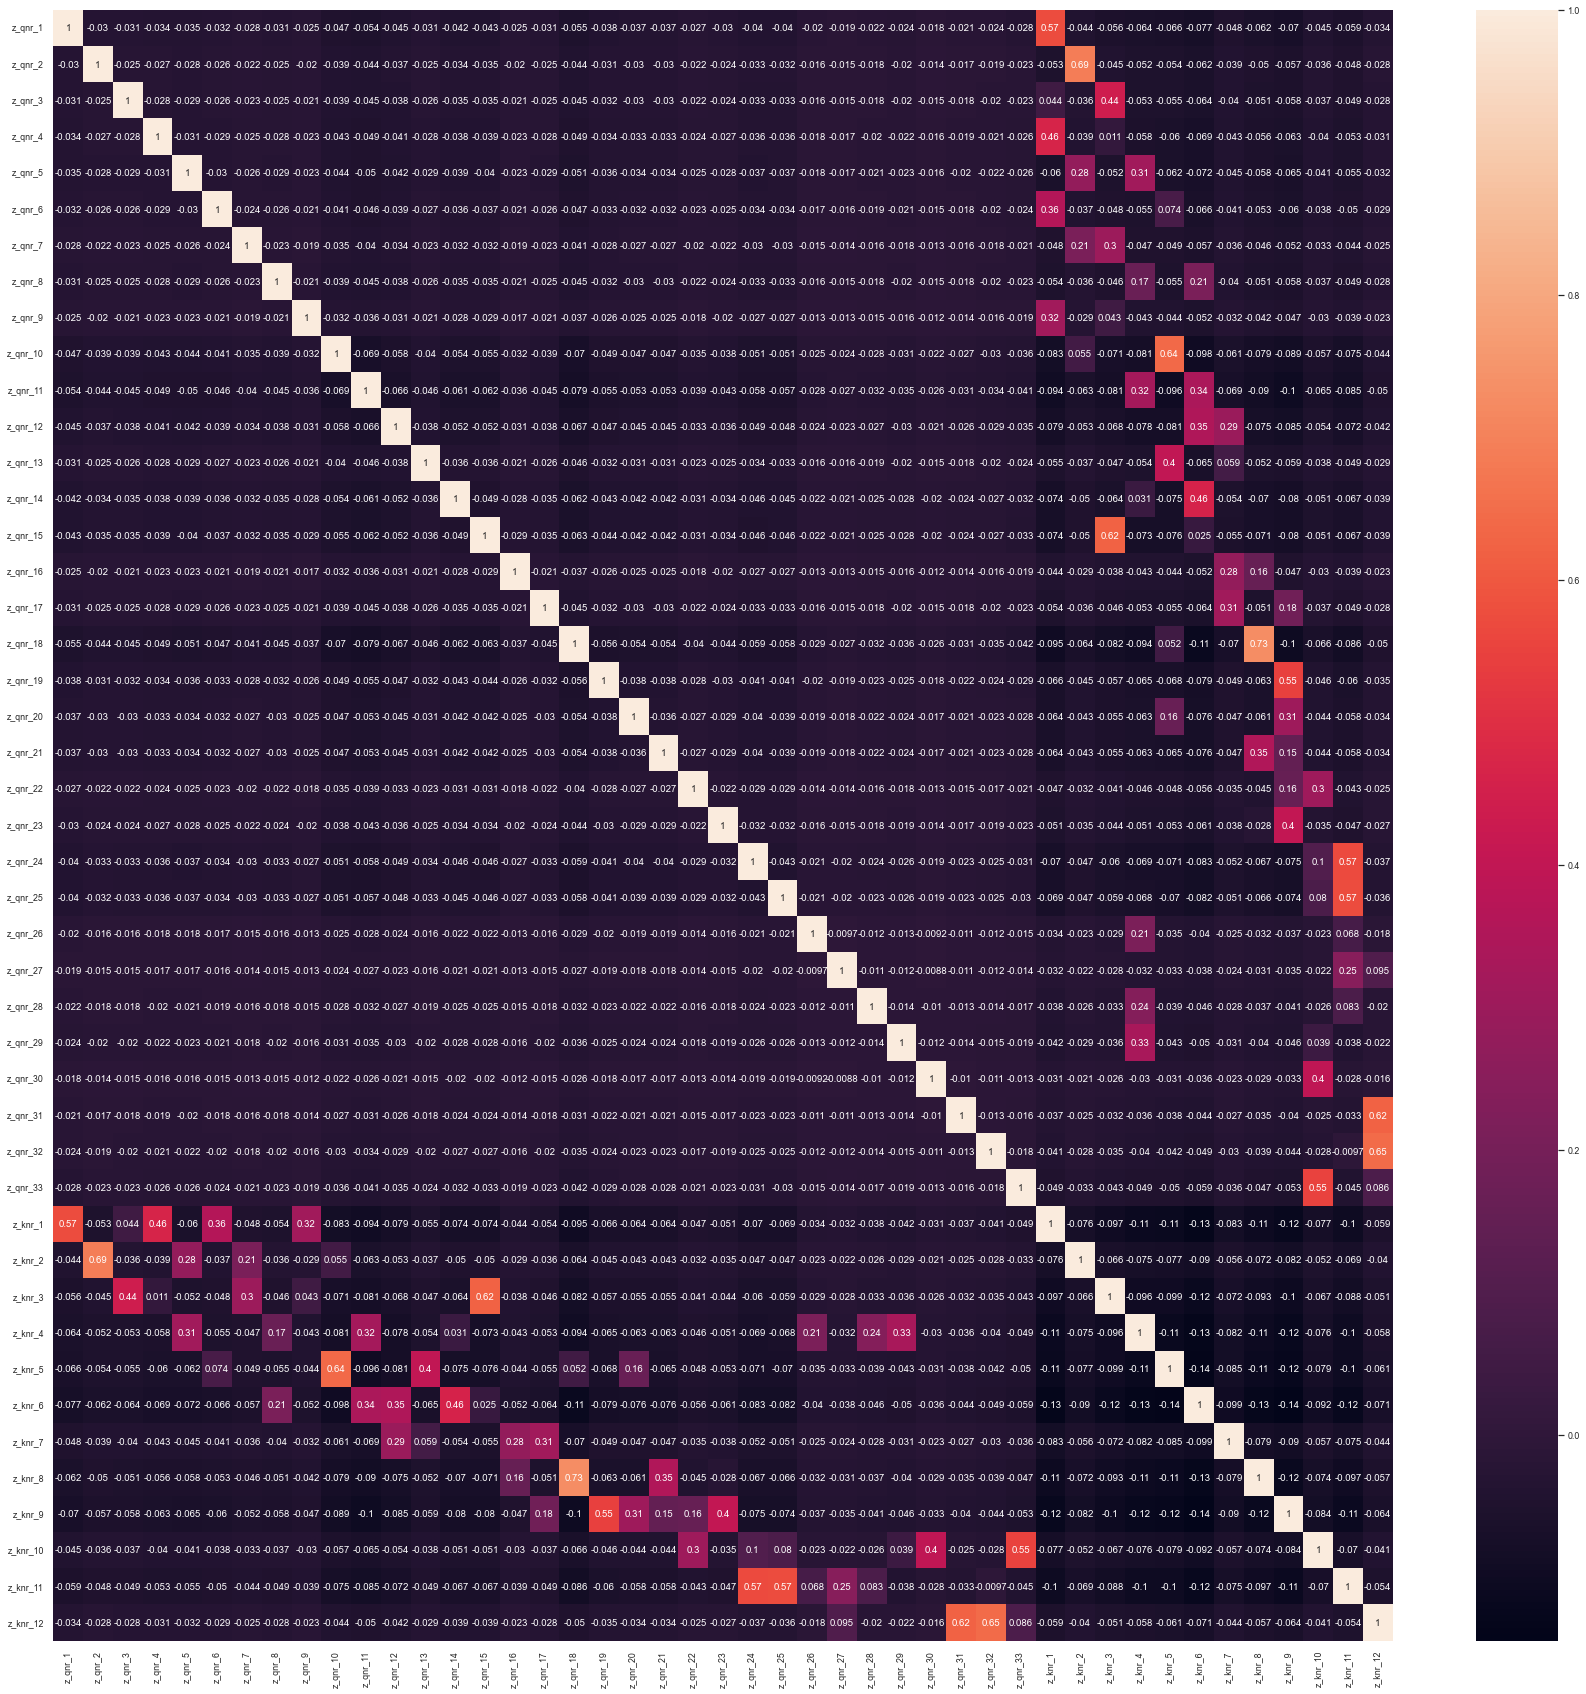

In [82]:
# dfv5 = dfacrpv[cng5]
# corr_matrix5 = dfv5.corr()
plt.figure(figsize=(30,30))
sn.set(font_scale = 0.8)
sn.heatmap(corr_matrix5, annot = True, )
plt.savefig('fig_corrmat_5.png')
plt.show()
